## Import Packages

In [1]:
import tensorflow as tf
import PIL
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path
from PIL import UnidentifiedImageError
from PIL import ImageFile  

In [2]:
ImageFile.LOAD_TRUNCATED_IMAGES = True 

## Data Pre-Proccessing

### Check for Improper Image Files 

In [26]:
path = Path("Comprehensive Disaster Dataset(CDD)").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

Comprehensive Disaster Dataset(CDD)\Fire_Disaster\Urban_Fire\01_01_0060.png
Comprehensive Disaster Dataset(CDD)\Fire_Disaster\Wild_Fire\01_02_0184.png
Comprehensive Disaster Dataset(CDD)\Fire_Disaster\Wild_Fire\01_02_0283.png
Comprehensive Disaster Dataset(CDD)\Fire_Disaster\Wild_Fire\01_02_0333.png
Comprehensive Disaster Dataset(CDD)\Fire_Disaster\Wild_Fire\01_02_0447.png
Comprehensive Disaster Dataset(CDD)\Human_Damage\02_0069.png
Comprehensive Disaster Dataset(CDD)\Land_Disaster\Land_Slide\04_01_0007.png
Comprehensive Disaster Dataset(CDD)\Land_Disaster\Land_Slide\04_01_0335.png
Comprehensive Disaster Dataset(CDD)\Land_Disaster\Land_Slide\04_01_0373.png


### 9 Improper Image Files Found, Delete Files from Dataset 

##### All improper image files have already been deleted in the dataset that was uploaded along with this file.  

In [2]:
path = Path("Comprehensive Disaster Dataset(CDD)").rglob("*.png")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)
print("Over!")

Over!


##### Create Training and Validation Sets for the Model

In [3]:
datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split = 0.2,
                                   horizontal_flip = True)
training_set = datagen.flow_from_directory('Comprehensive Disaster Dataset(CDD)',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 subset='training',
                                                 class_mode = 'categorical')

Found 10841 images belonging to 6 classes.


In [4]:
test_set = datagen.flow_from_directory('Comprehensive Disaster Dataset(CDD)',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 subset='validation',
                                                 class_mode = 'categorical')

Found 2707 images belonging to 6 classes.


## Building the Convolutional Neural Network

#### Initialising the Convolutional Neural Network

In [5]:
cnn = tf.keras.models.Sequential()

#### Adding the Convolution layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

#### Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### Adding a Dropout layer 

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

#### Adding Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units=6, activation='softmax'))

#### Summary 

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

### Training the Convolutional Neural Network

#### Compiling the Convolutional Neural Network

In [15]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#### Training the CNN on the Training set and evaluating it on the Validation set

In [16]:
model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
339/339 [==============================] - 635s 2s/step - loss: 0.9299 - accuracy: 0.6997 - val_loss: 0.8466 - val_accuracy: 0.7059
Epoch 2/25
339/339 [==============================] - 280s 826ms/step - loss: 0.8013 - accuracy: 0.7142 - val_loss: 0.7681 - val_accuracy: 0.7196
Epoch 3/25
339/339 [==============================] - 260s 767ms/step - loss: 0.7480 - accuracy: 0.7285 - val_loss: 0.7906 - val_accuracy: 0.7277
Epoch 4/25
339/339 [==============================] - 232s 685ms/step - loss: 0.7158 - accuracy: 0.7428 - val_loss: 0.7221 - val_accuracy: 0.7614
Epoch 5/25
339/339 [==============================] - 267s 790ms/step - loss: 0.6768 - accuracy: 0.7589 - val_loss: 0.7708 - val_accuracy: 0.7396
Epoch 6/25
339/339 [==============================] - 509s 2s/step - loss: 0.6428 - accuracy: 0.7675 - val_loss: 0.7001 - val_accuracy: 0.7699
Epoch 7/25
339/339 [==============================] - 322s 950ms/step - loss: 0.6122 - accuracy: 0.7796 - val_loss: 0.6742 - val_a

## Diagnose the Neural Network

### Plotting the Accuracy vs Epochs and Loss vs Epochs Graphs 

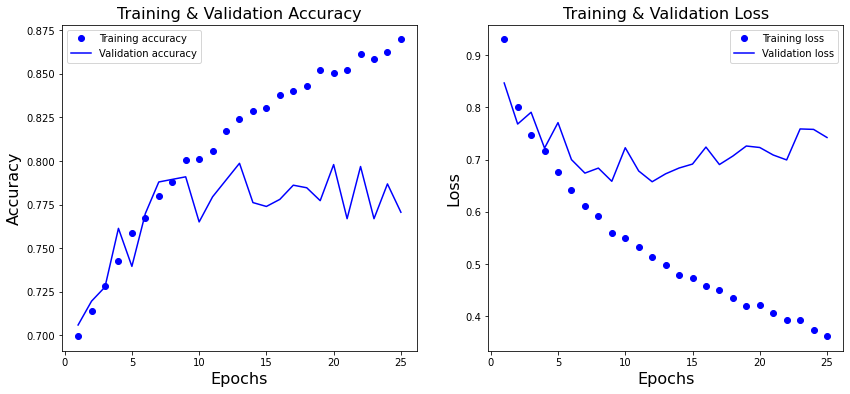

In [19]:
import matplotlib.pyplot as plt
  
history_dict = model.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
  
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss') 
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()